#Loan Prediction Challenge

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
train['Loan_Status'][train['Loan_Status'] == 'Y'] = 1
train['Loan_Status'][train['Loan_Status'] == 'N'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Fixing Outliers

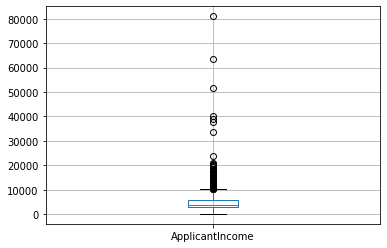

In [ ]:
train.boxplot(column=['ApplicantIncome'])

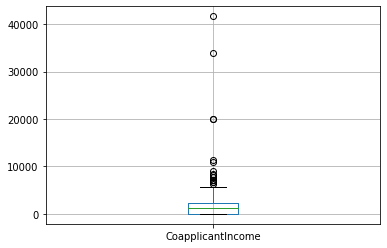

In [ ]:
train.boxplot(column=['CoapplicantIncome'])

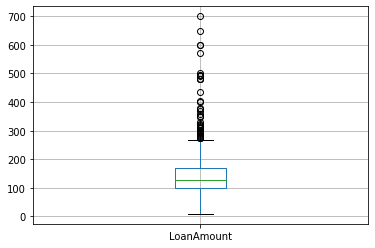

In [ ]:
train.boxplot(column=['LoanAmount'])

In [ ]:
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['ApplicantIncome'] < (Q1 - 3 * IQR)) | (train['ApplicantIncome'] > (Q3 + 3 * IQR)))]

In [ ]:
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['CoapplicantIncome'] < (Q1 - 3 * IQR)) | (train['CoapplicantIncome'] > (Q3 + 3 * IQR)))]

In [ ]:
Q1 = train['LoanAmount'].quantile(0.25)
Q3 = train['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1

train = train[~((train['LoanAmount'] < (Q1 - 3 * IQR)) | (train['LoanAmount'] > (Q3 + 3 * IQR)))]

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           15
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

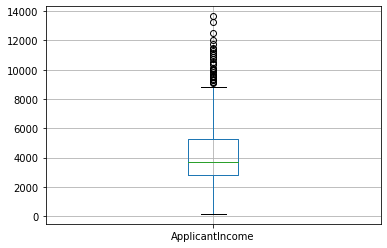

In [ ]:
train.boxplot(column=['ApplicantIncome'])

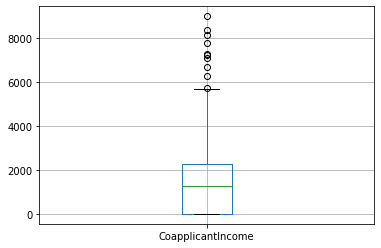

In [ ]:
train.boxplot(column=['CoapplicantIncome'])

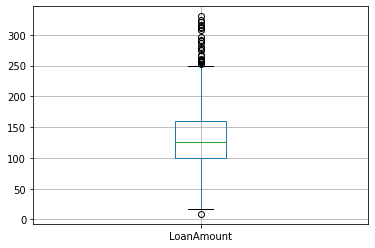

In [ ]:
train.boxplot(column=['LoanAmount'])

## Handling Imbalanced Data

In [ ]:
from sklearn.utils import resample
train['Loan_Status'].value_counts()

1    394
0    177
Name: Loan_Status, dtype: int64

In [ ]:
# Separate majority and minority classes
train_majority = train[train.Loan_Status==1]
train_minority = train[train.Loan_Status==0]
 
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=422,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train = pd.concat([train_majority, train_minority_upsampled])

In [ ]:
train.Loan_Status.value_counts()

0    422
1    394
Name: Loan_Status, dtype: int64

In [ ]:
train.shape, test.shape

((816, 13), (367, 12))

## Fixing Missing Values

In [ ]:
total_df = pd.concat([train, test], sort=False)

In [ ]:
total_df['Gender'].fillna(total_df['Gender'].mode()[0], inplace = True)
total_df['Married'].fillna(total_df['Married'].mode()[0], inplace = True)
total_df['Dependents'].fillna(total_df['Dependents'].mode()[0], inplace = True)
total_df['Self_Employed'].fillna(total_df['Self_Employed'].mode()[0], inplace = True)
total_df['LoanAmount'].fillna(total_df['LoanAmount'].mean(), inplace = True)
total_df['Loan_Amount_Term'].fillna(total_df['Loan_Amount_Term'].mode()[0], inplace = True)
total_df['Credit_History'].fillna(total_df['Credit_History'].mode()[0], inplace = True)

In [ ]:
total_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.00000,981.000000,981.000000
mean,5179.795107,1601.916330,142.51153,342.564730,0.849134
std,5695.104533,2718.772806,76.34777,64.482011,0.358101
min,0.000000,0.000000,9.00000,6.000000,0.000000
25%,2875.000000,0.000000,101.00000,360.000000,1.000000
50%,3800.000000,1110.000000,128.00000,360.000000,1.000000
75%,5516.000000,2365.000000,160.00000,360.000000,1.000000
max,81000.000000,41667.000000,700.00000,480.000000,1.000000


In [ ]:
total_df['Gender'].value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [ ]:
total_df.drop('Loan_Amount_Term', axis = 1, inplace = True)

# Feature Engineering

In [ ]:
total_df.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
total_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,1.0,Urban,1


In [ ]:
total_df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
#total_df['TotalIncome'] = total_df['ApplicantIncome'] + total_df['CoapplicantIncome']

In [ ]:
X = total_df.drop('Loan_Status', axis = 1)
X = X.drop('Loan_ID', axis = 1)
Y = total_df['Loan_Status']

In [ ]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
X.shape, Y.shape

((981, 10), (981,))

In [ ]:
X_cat = X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis = 1)
X_num = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

In [ ]:
X_num

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,142.51153
1,4583,1508.0,128.00000
2,3000,0.0,66.00000
3,2583,2358.0,120.00000
4,6000,0.0,141.00000
...,...,...,...
362,4009,1777.0,113.00000
363,4158,709.0,115.00000
364,3250,1993.0,126.00000
365,5000,2393.0,158.00000


In [ ]:
X_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,142.51153
1,4583,1508.0,128.00000
2,3000,0.0,66.00000
3,2583,2358.0,120.00000
4,6000,0.0,141.00000


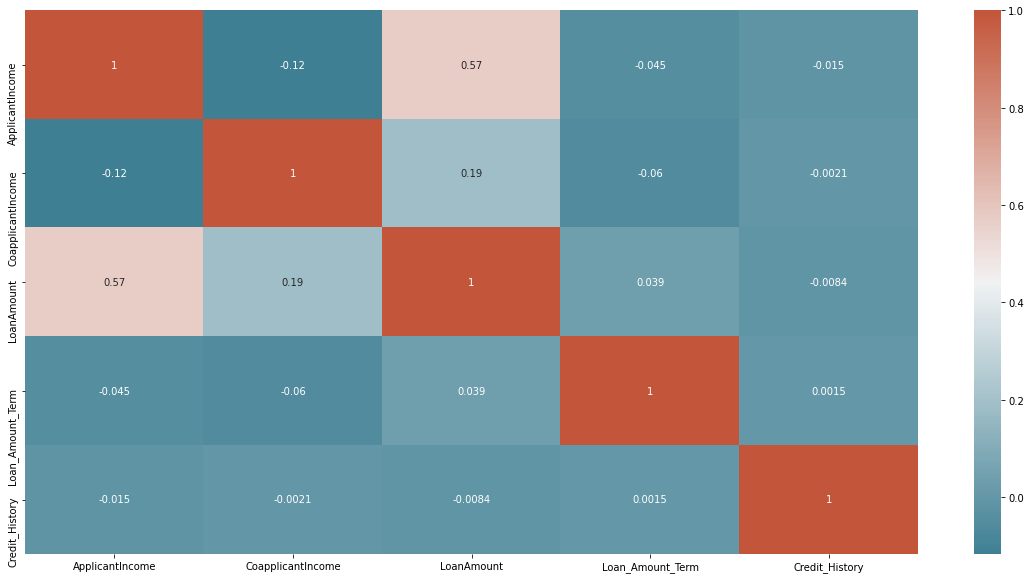

In [ ]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
X_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,142.51153
1,4583,1508.0,128.00000
2,3000,0.0,66.00000
3,2583,2358.0,120.00000
4,6000,0.0,141.00000


In [ ]:
X_one_hot = pd.get_dummies(X_cat, columns = X_cat.columns)

In [ ]:
X_cat.shape, X_one_hot.shape, X_num.shape

((981, 7), (981, 17), (981, 3))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


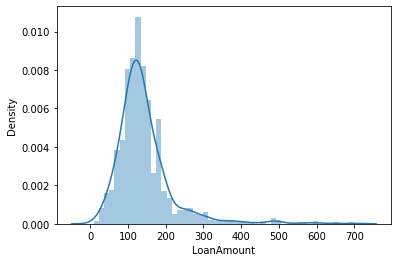

In [ ]:
sns.distplot(X_num['LoanAmount'])

In [ ]:
X_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.000000,981.000000,981.00000
mean,5179.795107,1601.916330,142.51153
std,5695.104533,2718.772806,76.34777
min,0.000000,0.000000,9.00000
25%,2875.000000,0.000000,101.00000
50%,3800.000000,1110.000000,128.00000
75%,5516.000000,2365.000000,160.00000
max,81000.000000,41667.000000,700.00000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


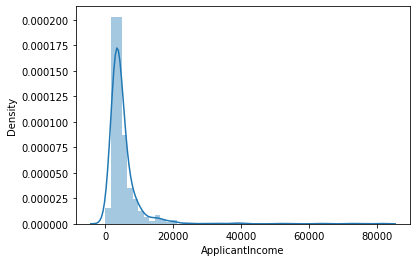

In [ ]:
sns.distplot(X_num['ApplicantIncome'])

In [ ]:
X_num['LoanAmount']

0      142.51153
1      128.00000
2       66.00000
3      120.00000
4      141.00000
         ...    
362    113.00000
363    115.00000
364    126.00000
365    158.00000
366     98.00000
Name: LoanAmount, Length: 981, dtype: float64

In [ ]:
X_num = X_num[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].applymap(lambda x: np.log(x+1))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


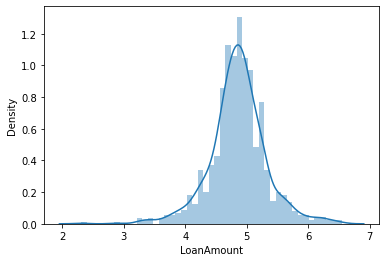

In [ ]:
sns.distplot(X_num['LoanAmount'])

In [ ]:
'''
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
scaler.fit(X_num)

X_num = pd.DataFrame(scaler.transform(X_num), columns = X_num.columns)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nimport warnings\nwarnings.filterwarnings("ignore")\n\nscaler = StandardScaler()\nscaler.fit(X_num)\n\nX_num = pd.DataFrame(scaler.transform(X_num), columns = X_num.columns)\n'

In [ ]:
X_num.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [ ]:
X_num.shape, Y.shape

((981, 3), (981,))

## Modeling

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.51153,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00000,1.0,Urban


In [ ]:
X_num.reset_index(inplace = True, drop = True)
X_one_hot.reset_index(inplace = True, drop = True)

In [ ]:
X = pd.concat([X_one_hot, X_num], axis = 1)

In [ ]:
X.shape

(981, 20)

In [ ]:
X_train = X[:614]
X_test = X[614:]

Y_train = Y[:614]

In [ ]:
Y_train=Y_train.astype('int')

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    clf = model
    # evaluate model
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores)

In [ ]:
def cv_loop(X, Y, model):

  mean_acc = []
  seed = 42

  for i in range(10):

      X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size = .20, random_state = i*seed)

      # train model and make predictions
      model.fit(X_train, y_train) 
      preds = model.predict(X_cv)

      # compute acc metric for this CV fold
      mean_acc.append(accuracy_score(y_cv, preds))
      
  return np.mean(mean_acc)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
def model_testing(X, Y):
    print("Logistic Regression:")
    for c in [0.01, 0.1, 1, 10, 100]:
        acc = evaluate_model(X.values, Y.values, 3, LogisticRegression(C = c))
        print(f"For C: {c}, ACC: {acc}")

    print("KNN:")
    for n in [3, 5, 9, 15, 25, 35, 45]:
        acc = evaluate_model(X.values, Y.values, 3, KNeighborsClassifier(n_neighbors = n))
        print(f"For N: {n}, ACC: {acc}")

    print("SVC:")
    for c in [0.01, 0.1, 1, 10, 100]:
        acc = evaluate_model(X.values, Y.values, 3, SVC(C = c, random_state=42))
        print(f"For C: {c}, ACC: {acc}")
    
    print("Decision Trees:")
    for d in [1, 3, 5, 9, 15, None]:
        acc = evaluate_model(X.values, Y.values, 3, DecisionTreeClassifier(max_depth = d, random_state=42))
        print(f"For Max_Depth: {d}, ACC: {acc}")
    
    print("Naive Bayes:")
    acc = evaluate_model(X.values, Y.values, 3, GaussianNB())
    print(f"ACC: {acc}")

    print("Random Forest:")
    for n in [5, 10, 25, 50, 100, 200, 500, 1000]:
        acc = evaluate_model(X.values, Y.values, 3, RandomForestClassifier(n_estimators = n, random_state=42))
        print(f"For n_estimators: {n}, ACC: {acc}")

    print("XGBoost:")
    for l in [0.001, 0.01, 0.1, 0.5, 1]:
        acc = evaluate_model(X.values, Y.values, 3, XGBClassifier(learning_rate = l))
        print(f"For learning_rate: {l}, ACC: {acc}")

In [ ]:
model_testing(X_train, Y_train)

Logistic Regression:
For C: 0.01, ACC: 0.700315429383802
For C: 0.1, ACC: 0.8094317828424183
For C: 1, ACC: 0.8078013239148784
For C: 10, ACC: 0.80671731307477
For C: 100, ACC: 0.80671731307477
KNN:
For N: 3, ACC: 0.717699586831934
For N: 5, ACC: 0.7556577369052379
For N: 9, ACC: 0.7616508951974766
For N: 15, ACC: 0.7589408680972056
For N: 25, ACC: 0.7356035363632325
For N: 35, ACC: 0.7165978053223157
For N: 45, ACC: 0.7057488115864764
SVC:
For C: 0.01, ACC: 0.6872850859656137
For C: 0.1, ACC: 0.6872850859656137
For C: 1, ACC: 0.8094317828424183
For C: 10, ACC: 0.8094317828424183
For C: 100, ACC: 0.8094228975076635
Decision Trees:
For Max_Depth: 1, ACC: 0.8094317828424183
For Max_Depth: 3, ACC: 0.8056333022346617
For Max_Depth: 5, ACC: 0.7877071393664756
For Max_Depth: 9, ACC: 0.7475454262739347
For Max_Depth: 15, ACC: 0.7030387844862056
For Max_Depth: None, ACC: 0.7073703851792617
Naive Bayes:
ACC: 0.8088853347549867
Random Forest:
For n_estimators: 5, ACC: 0.7556755075747479
For n_es

## Submission with the Best Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_validation1, Y_train1, Y_validation1 = train_test_split(X_train, Y_train, train_size=0.7, random_state=1234)

In [ ]:
#model = DecisionTreeClassifier(max_depth = 15, random_state=42)
#model = LogisticRegression(C = 0.1)
#model = RandomForestClassifier(n_estimators = 100, random_state=42)
model = XGBClassifier(learning_rate = 0.1)

model.fit(X_train1, Y_train1)
preds = model.predict(X_validation1)

accuracy_score(preds, Y_validation1)

0.7891891891891892

In [ ]:
test.shape, X_test.shape

((367, 12), (367, 20))

In [ ]:
preds = model.predict(X_test)

In [ ]:
df = pd.DataFrame(test['Loan_ID'], columns = ['Loan_ID']) 
df['Loan_Status'] = preds

In [ ]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
df['Loan_Status'][df['Loan_Status']==1] = 'Y'
df['Loan_Status'][df['Loan_Status']==0] = 'N'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
df.to_csv('Submission28_xgb_simple_0.01.csv', index = False)

## XGBoost - HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.001, 0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['binary:logistic']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_, gsearch.best_score_

In [ ]:
hyperParameterTuning(X_train1,Y_train1)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.9min finished


({'colsample_bytree': 0.5,
  'learning_rate': 0.001,
  'max_depth': 5,
  'min_child_weight': 1,
  'n_estimators': 500,
  'objective': 'binary:logistic',
  'subsample': 0.7},
 0.8018057455540356)

In [ ]:
model = XGBClassifier(colsample_bytree= 0.5,
  learning_rate= 0.001,
  max_depth= 5,
  min_child_weight= 1,
  n_estimators= 500,
  objective= 'binary:logistic',
  subsample= 0.7)

model.fit(X_train1, Y_train1)
preds = model.predict(X_validation1)

accuracy_score(preds, Y_validation1)

0.8324324324324325

In [ ]:
test.shape, X_test.shape

((367, 12), (367, 20))

In [ ]:
preds = model.predict(X_test)

In [ ]:
df = pd.DataFrame(test['Loan_ID'], columns = ['Loan_ID']) 
df['Loan_Status'] = preds

In [ ]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
df['Loan_Status'][df['Loan_Status']==1] = 'Y'
df['Loan_Status'][df['Loan_Status']==0] = 'N'

In [ ]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
df.to_csv('Submission30_xgb_hypertune.csv', index = False)

#Summary

Best Submission Score: 0.8125

Best Model: XGBoost with Feature Engineering

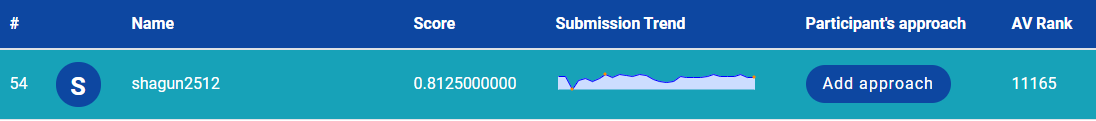

Competition Link: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii

Rank Scored: 54 out of 65683 participants.